<a href="https://colab.research.google.com/github/maxla777/Project-2/blob/Monique/Monique/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamental Analysis

Market cap = current price * circulating supply
1.    NVT Ratio: (Network Value (market cap)) / Daily USD volume
    * NVT indicates whether a coin's price is overvalued or undervalued
    * NVT is a good indicator for revealing speculative value and possible bubbles
2.    MVRV Ratio: (Market cap) / (Realized cap)
    *   Good instrument for estimating if market participants are in profit or not
    *   MVRV is an excellent tool for determining if bitcoin is overvalued or undervalued during market cycles
    *   Negative MVRV ratio indicates market participants being not in profit, or minimally in profit 
    *   Positive MVRV indicates asset holders likely being in profit



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# csv_path = Path('/content/drive/MyDrive/Colab Notebooks/btc.csv')
# btc_data=pd.read_csv(csv_path)
# btc_data.tail()

In [4]:
# btc_data.set_index(pd.to_datetime(btc_data['time'], infer_datetime_format=True), inplace=True)
# btc_data.drop(columns=['time'], inplace=True)
# btc_data.tail()


In [5]:
# btc_data = btc_data.dropna().copy()
# btc_data.head()

In [6]:
# Copy needed columns - CapMrktCurUSD & CapRealUSD
# btc_cap_df = btc_data[['CapMrktCurUSD', 'CapRealUSD']].copy()
# btc_cap_df.tail()

In [7]:
# btc_cap_df['MVRV'] = btc_cap_df['CapMrktCurUSD'] / btc_cap_df['CapRealUSD']
# btc_cap_df.tail()

In [8]:
# btc_cap_df['MVRV_change'] = btc_cap_df['MVRV'].diff()
# btc_cap_df.tail()

In [9]:
# Set short and long windows
# short_window = 1
# long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
# btc_cap_df['fast_MVRV'] = btc_cap_df['MVRV'].ewm(halflife=short_window).mean()
# btc_cap_df['slow_MVRV'] = btc_cap_df['MVRV'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
# btc_cap_df['MVRV_long'] = np.where(btc_cap_df['fast_MVRV'] > btc_cap_df['slow_MVRV'], 1.0, 0.0)
# btc_cap_df['MVRV_short'] = np.where(btc_cap_df['fast_MVRV'] < btc_cap_df['slow_MVRV'], -1.0, 0.0)
# btc_cap_df['MVRV_signal'] = btc_cap_df['MVRV_long'] + btc_cap_df['MVRV_short']

# btc_cap_df.head()

In [10]:
# btc_cap_df[['MVRV', 'fast_MVRV', 'slow_MVRV']].plot(figsize=(20,10))

In [11]:
# btc_cap_df[['CapMrktCurUSD', 'CapRealUSD']].plot()

In [12]:
# btc_cap_df[['MVRV']].plot()

# Machine Learning Models

To be updated with dates group decides on

In [13]:
csv_path = Path('/content/drive/MyDrive/Colab Notebooks/kraken_pull_EthExample.csv')
eth_data=pd.read_csv(csv_path)
eth_data.set_index(pd.to_datetime(eth_data['Date'], infer_datetime_format=True), inplace=True)
eth_data.drop(columns=['Date'], inplace=True)
eth_data.head()

,Open,High,Low,Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-19,174.04,174.68,169.28,173.52,25695.136541,-0.002988,168.217756,166.347304,1.0,0.0,1.0,0.037978,0.047122,1.0,0.0,1.0,165.3860,10.270640,175.656640,155.115360,0.0,0.0,0.0,0.0
2019-04-20,173.55,178.00,170.43,173.75,26165.684677,0.001325,168.975109,166.835017,1.0,0.0,1.0,0.035301,0.045580,1.0,0.0,1.0,167.0090,8.708409,175.717409,158.300591,0.0,0.0,0.0,1.0
2019-04-21,173.77,174.29,166.20,169.90,29212.243595,-0.022158,169.100789,167.030720,1.0,0.0,1.0,0.034357,0.044797,1.0,0.0,1.0,168.4515,6.214429,174.665929,162.237071,0.0,0.0,0.0,0.0
2019-04-22,169.84,174.05,168.05,171.56,26074.473899,0.009770,169.432824,167.311556,1.0,0.0,1.0,0.032018,0.043390,1.0,0.0,1.0,168.7985,6.182904,174.981404,162.615596,0.0,0.0,0.0,1.0
2019-04-23,171.56,176.94,168.84,170.51,35068.200810,-0.006120,169.577455,167.504483,1.0,0.0,1.0,0.029966,0.042206,1.0,0.0,1.0,169.2590,5.932951,175.191951,163.326049,0.0,0.0,0.0,0.0


In [14]:
eth_data.tail()

,Open,High,Low,Close,Volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-15,1847.80,1890.99,1735.72,1793.23,72686.990028,-0.029532,1757.965122,1556.221979,1.0,0.0,1.0,0.050822,0.056971,1.0,0.0,1.0,1658.1370,164.111529,1822.248529,1494.025471,0.0,0.0,-1.0,0.0
2021-03-16,1794.11,1818.00,1712.03,1805.14,49192.414910,0.006642,1764.071884,1564.701040,1.0,0.0,1.0,0.047424,0.056188,1.0,0.0,1.0,1667.1435,167.113171,1834.256671,1500.030329,0.0,0.0,0.0,1.0
2021-03-17,1805.69,1839.54,1743.01,1823.76,47484.969516,0.010315,1771.798477,1573.525540,1.0,0.0,1.0,0.044289,0.055415,1.0,0.0,1.0,1684.2475,164.619259,1848.866759,1519.628241,0.0,0.0,0.0,1.0
2021-03-18,1824.40,1849.00,1759.79,1776.57,44571.048795,-0.025875,1772.416148,1580.441979,1.0,0.0,1.0,0.042748,0.054948,1.0,0.0,1.0,1700.8095,155.740402,1856.549902,1545.069098,0.0,0.0,0.0,0.0
2021-03-19,1776.57,1785.00,1731.40,1778.28,10289.350393,0.000963,1773.175220,1587.181069,1.0,0.0,1.0,0.039886,0.054203,1.0,0.0,1.0,1716.7170,145.793739,1862.510739,1570.923261,0.0,0.0,0.0,1.0


In [15]:
# Construct training start and end dates
training_start = eth_data.index.min().strftime(format= '%Y-%m-%d')
# training_start = '2020-12-15'
training_end = '2020-08-20'

# Construct testing start and end dates
testing_start = '2020-08-21'
# testing_end = '2021-02-16'
testing_end = eth_data.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2019-04-19
Training End: 2020-08-20
Testing Start: 2020-08-21
Testing End: 2021-03-19


In [16]:
# Create features
X = eth_data.drop(columns=['Positive Return', 'daily_return', 'fast_close',	'slow_close',	'crossover_long',	'crossover_short',	'crossover_signal',	'fast_vol',	'slow_vol',	'vol_trend_long',	'vol_trend_short',	'vol_trend_signal',	'bollinger_mid_band',	'bollinger_std',	'bollinger_upper_band', 'bollinger_lower_band',	'bollinger_long',	'bollinger_short',	'bollinger_signal'])

# Create target
y = eth_data['Positive Return']

In [17]:
# Construct the X_train and y_train datasets
X_train = X[training_start:training_end]
y_train = eth_data['Positive Return'][training_start:training_end]

X_train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-16,432.52,437.49,412.48,433.67,64246.018129
2020-08-17,433.99,447.44,420.51,431.35,70593.777728
2020-08-18,431.34,434.20,412.11,422.62,77628.456012
2020-08-19,422.61,426.50,393.33,407.57,91227.613999
2020-08-20,407.57,419.54,402.48,416.20,58454.613919


In [18]:
from sklearn.preprocessing import StandardScaler
#Create the StandardScaler instance
scaler = StandardScaler()

In [19]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [20]:
# Construct the X test and y test datasets
X_test = X[testing_start:testing_end]
y_test = y[testing_start:testing_end]

X_test.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-15,1847.80,1890.99,1735.72,1793.23,72686.990028
2021-03-16,1794.11,1818.00,1712.03,1805.14,49192.414910
2021-03-17,1805.69,1839.54,1743.01,1823.76,47484.969516
2021-03-18,1824.40,1849.00,1759.79,1776.57,44571.048795
2021-03-19,1776.57,1785.00,1731.40,1778.28,10289.350393


In [21]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report, precision_recall_curve, roc_auc_score, hamming_loss, jaccard_score, matthews_corrcoef

In [23]:
# Fit a SKLearn linear regression using the training set (X_train, y_train):
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=300,
    random_state=0
)
model.fit(X_train_scaled, y_train)

# Make a prediction of "y" values from the X_test dataset
AB_predictions = model.predict(X_test_scaled)

# Assemble actual y data (y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = AB_predictions
Results

,Positive Return,Predicted Value
Date,,
2020-08-21,0.0,0.0
2020-08-22,1.0,0.0
2020-08-23,0.0,0.0
2020-08-24,1.0,1.0
2020-08-25,0.0,0.0
...,...,...
2021-03-15,0.0,1.0
2021-03-16,1.0,1.0
2021-03-17,1.0,1.0


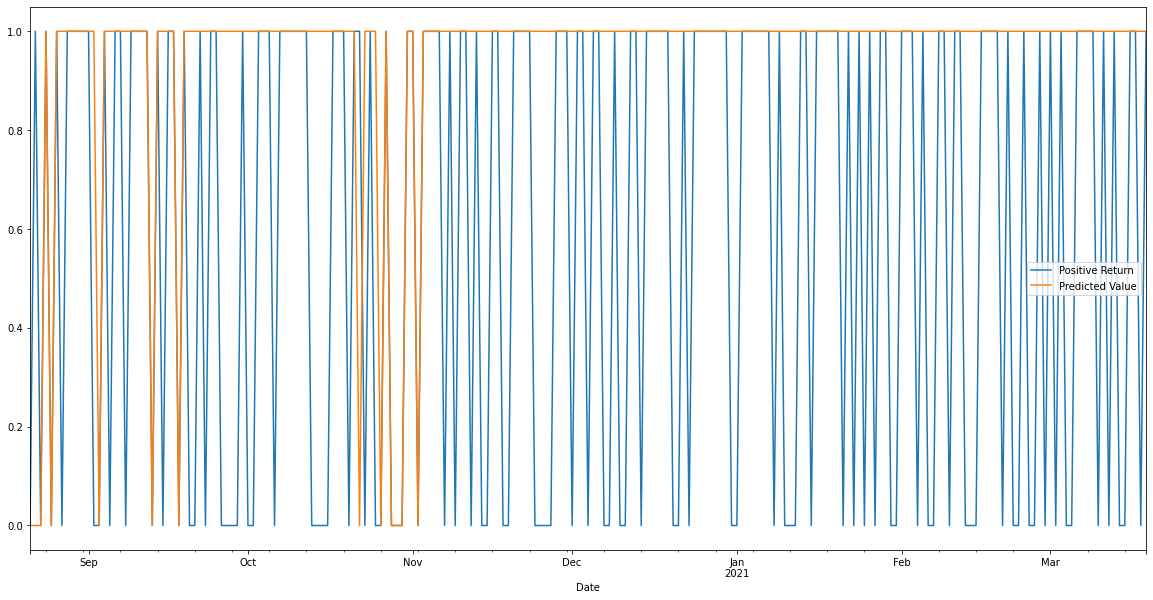

In [24]:
AB_Results = Results[['Positive Return','Predicted Value']]
AB_Results.plot(figsize=(20,10))

## Features

In [25]:
AB_importances = model.feature_importances_

AB_importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
AB_importances_sorted

[(0.48, 'Open'),
 (0.44666666666666666, 'Close'),
 (0.04, 'Volume'),
 (0.023333333333333334, 'Low'),
 (0.01, 'High')]

## Metrics

In [26]:
# Compute confusion matrix
AB_cm = confusion_matrix(y_test, AB_predictions)
# Create a DataFrame with the labelled classes
AB_cm_df = pd.DataFrame(
    AB_cm, index=['Actual Not Positive', 'Actual Positive'], columns=['Predicted Not Positive', 'Predicted Positive']
)
# Set target names for the classification report
AB_target_names = ['Not Positive', 'Positive']
# Compute the accuracy score
AB_acc_score = accuracy_score(y_test, AB_predictions)
# Compute the balanced accuracy score
AB_bal_acc_score = balanced_accuracy_score(y_test, AB_predictions)
# Predict class probabilities for the features 
AB_probs = model.predict_proba(X_test_scaled)[:,1]
# Compute precision-recall pairs
AB_precision, AB_recall, _ = precision_recall_curve(y_test, AB_probs, pos_label=1)
# Compute the AUPRC - the area under the curve
AB_auprc_score = roc_auc_score(y_test, AB_probs)
# Compute the Matthews correlation coefficient (MCC)
AB_MCC_score = matthews_corrcoef(y_test, AB_predictions)
# Compute the Jaccard similarity coefficent score
AB_J_score = jaccard_score(y_test, AB_predictions)
# Compute the average Hamming loss
AB_H_loss = hamming_loss(y_test, AB_predictions)

Accuracy Score: 0.626
Balanced Accuracy Score: 0.554
Matthews correlation coefficient score: 0.223
Jaccard similarity coefficient score: 0.605
Average Hamming Loss: 0.374
Classification Report:
              precision    recall  f1-score   support

Not Positive       0.85      0.12      0.22        88
    Positive       0.61      0.98      0.75       123

    accuracy                           0.63       211
   macro avg       0.73      0.55      0.49       211
weighted avg       0.71      0.63      0.53       211

Confusion Matrix:


,Predicted Not Positive,Predicted Positive
Actual Not Positive,11,77
Actual Positive,2,121


Precision-Recall Curve
Area Under the Curve: 0.5637010347376201


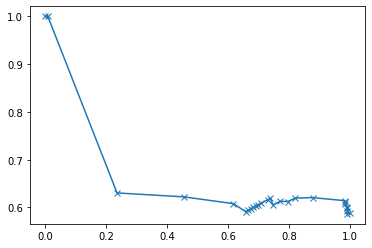

In [27]:
print("Accuracy Score:", round(AB_acc_score, ndigits=3))
print("Balanced Accuracy Score:", round(AB_bal_acc_score, ndigits=3))
print("Matthews correlation coefficient score:", round(AB_MCC_score, ndigits=3))
print("Jaccard similarity coefficient score:", round(AB_J_score, ndigits=3))
print("Average Hamming Loss:", round(AB_H_loss, ndigits=3))
print("Classification Report:")
print(classification_report(y_test, AB_predictions, target_names=AB_target_names))
print("Confusion Matrix:")
display(AB_cm_df)
print("Precision-Recall Curve")
print("Area Under the Curve:", AB_auprc_score)
plt.plot(AB_recall, AB_precision, marker='x')

## Save Model

In [28]:
# Save the model once satisfied with results
# from joblib import dump, load
# dump(model, 'AdaBoost_model.joblib') 

# Load saved model to use on other datasets
# model = load('AdaBoost_model.joblib') 


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [30]:
# Fit a SKLearn linear regression using just the training set (X_train, y_train):
model = RandomForestClassifier(n_estimators=300, max_depth=1, random_state=0)
model.fit(X_train_scaled, y_train)

# Make a prediction of "y" values from the X_test dataset
RF_predictions = model.predict(X_test_scaled)

# Assemble actual y data (y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = RF_predictions
Results

,Positive Return,Predicted Value
Date,,
2020-08-21,0.0,1.0
2020-08-22,1.0,1.0
2020-08-23,0.0,1.0
2020-08-24,1.0,1.0
2020-08-25,0.0,1.0
...,...,...
2021-03-15,0.0,1.0
2021-03-16,1.0,1.0
2021-03-17,1.0,1.0


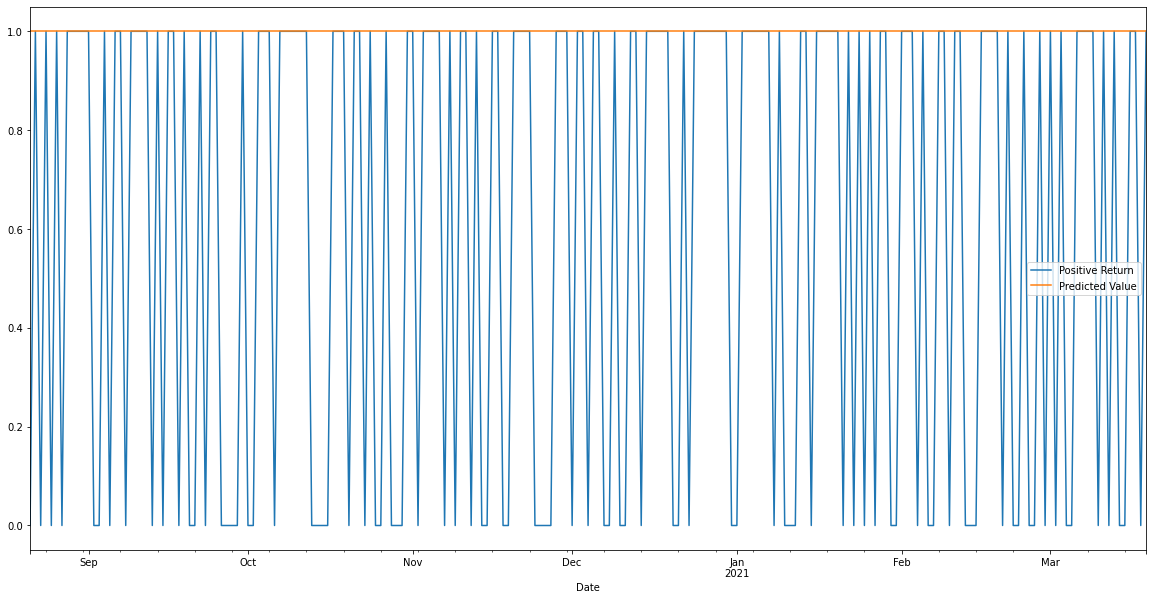

In [31]:
RF_Results = Results[['Positive Return','Predicted Value']]
RF_Results.plot(figsize=(20,10))

## Features

In [32]:
RF_importances = model.feature_importances_

RF_importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
RF_importances_sorted

[(0.33666666666666667, 'Close'),
 (0.21, 'Open'),
 (0.21, 'Low'),
 (0.12666666666666668, 'Volume'),
 (0.11666666666666667, 'High')]

## Metrics

In [33]:
# Compute confusion matrix
RF_cm = confusion_matrix(y_test, RF_predictions)
# Create a DataFrame with the labelled classes
RF_cm_df = pd.DataFrame(
    RF_cm, index=['Actual Not Positive', 'Actual Positive'], columns=['Predicted Not Positive', 'Predicted Positive']
)
# Set target names for the classification report
RF_target_names = ['Not Positive', 'Positive']
# Compute the accuracy score
RF_acc_score = accuracy_score(y_test, RF_predictions)
# Compute the balanced accuracy score
RF_bal_acc_score = balanced_accuracy_score(y_test, RF_predictions)
# Predict class probabilities for the features 
RF_probs = model.predict_proba(X_test_scaled)[:,1]
# Compute precision-recall pairs
RF_precision, RF_recall, _ = precision_recall_curve(y_test, RF_probs, pos_label=1)
# Compute the AUPRC - the area under the curve
RF_auprc_score = roc_auc_score(y_test, RF_probs)
# Compute the Matthews correlation coefficient (MCC)
RF_MCC_score = matthews_corrcoef(y_test, RF_predictions)
# Compute the Jaccard similarity coefficent score
RF_J_score = jaccard_score(y_test, RF_predictions)
# Compute the average Hamming loss
RF_H_loss = hamming_loss(y_test, RF_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Accuracy Score: 0.583
Balanced Accuracy Score: 0.5
Matthews correlation coefficient score: 0.0
Jaccard similarity coefficient score: 0.583
Average Hamming Loss: 0.417
Classification Report:
              precision    recall  f1-score   support

Not Positive       0.00      0.00      0.00        88
    Positive       0.58      1.00      0.74       123

    accuracy                           0.58       211
   macro avg       0.29      0.50      0.37       211
weighted avg       0.34      0.58      0.43       211

Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Predicted Not Positive,Predicted Positive
Actual Not Positive,0,88
Actual Positive,0,123


Precision-Recall Curve
Area Under the Curve: 0.5134885439763488


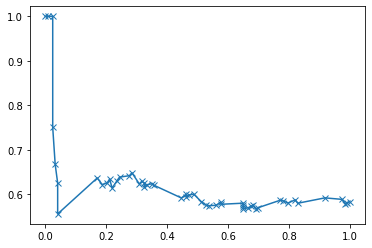

In [34]:
print("Accuracy Score:", round(RF_acc_score, ndigits=3))
print("Balanced Accuracy Score:", round(RF_bal_acc_score, ndigits=3))
print("Matthews correlation coefficient score:", round(RF_MCC_score, ndigits=3))
print("Jaccard similarity coefficient score:", round(RF_J_score, ndigits=3))
print("Average Hamming Loss:", round(RF_H_loss, ndigits=3))
print("Classification Report:")
print(classification_report(y_test, RF_predictions, target_names=RF_target_names))
print("Confusion Matrix:")
display(RF_cm_df)
print("Precision-Recall Curve")
print("Area Under the Curve:", RF_auprc_score)
plt.plot(RF_recall, RF_precision, marker='x')

## Save Model

In [35]:
# Save the model once satisfied with results
# from joblib import dump, load
# dump(model, 'RandomForest_model.joblib') 

# Load saved model to use on other datasets
# model = load('RandomForest_model.joblib') 
